# 20 — Colors, Palettes, and Accessibility

## Goal
Choose colors that are readable, consistent, and accessible (including for color-vision deficiencies).

### What you'll learn
- Types of palettes: categorical, sequential, diverging
- Color theory basics for data viz
- Colorblind-friendly palettes
- Using colormaps correctly
- Mapping values to color with `Normalize`
- Practical palette templates for dashboards


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.colors import Normalize

%matplotlib inline
np.random.seed(42)
print('✅ Setup complete')

✅ Setup complete


## 1. Palette Types

### Categorical (distinct groups)
Use for discrete categories (A/B/C).

### Sequential (low→high)
Use for non-negative or ordered values (intensity, counts).

### Diverging (negative↔positive)
Use when 0 (or a reference) is meaningful.

### Common best practice
- Avoid rainbow for continuous data (can create false boundaries).
- Prefer perceptually uniform: `viridis`, `cividis`.


=== PALETTE SWATCHES ===


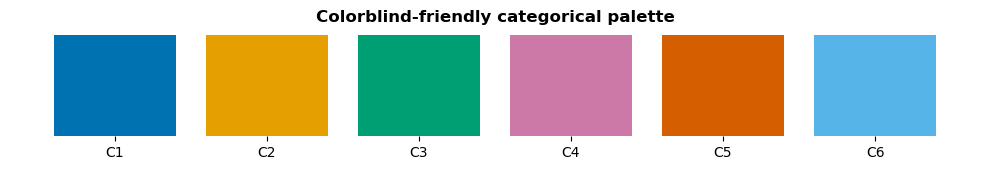

In [2]:
print('=== PALETTE SWATCHES ===')
categorical = ['#0072B2', '#E69F00', '#009E73', '#CC79A7', '#D55E00', '#56B4E9']

fig, ax = plt.subplots(figsize=(10, 1.8))
for i, c in enumerate(categorical):
    ax.bar(i, 1, color=c)
ax.set_title('Colorblind-friendly categorical palette', fontweight='bold')
ax.set_xticks(range(len(categorical)))
ax.set_xticklabels([f'C{i+1}' for i in range(len(categorical))])
ax.set_yticks([])
for spine in ax.spines.values():
    spine.set_visible(False)
plt.tight_layout()
plt.show()

## 2. Mapping Values to Color (Normalize + Colormap)

```python
norm = Normalize(vmin=min_val, vmax=max_val)
colors = cm.viridis(norm(values))
ax.scatter(x, y, c=colors)
```
This gives consistent color meaning across plots.


=== VALUE-TO-COLOR MAPPING ===


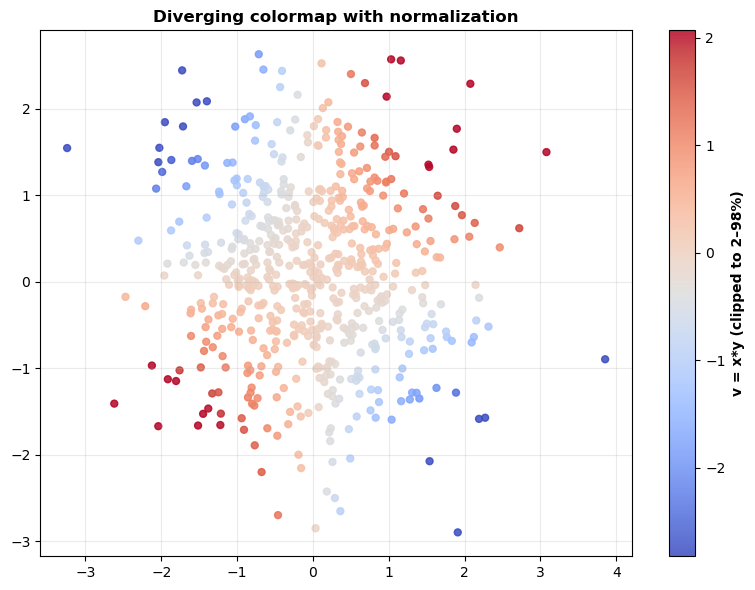

In [3]:
print('=== VALUE-TO-COLOR MAPPING ===')
n = 600
x = np.random.randn(n)
y = np.random.randn(n)
v = x*y

norm = Normalize(vmin=np.percentile(v, 2), vmax=np.percentile(v, 98))
colors_ = cm.coolwarm(norm(v))

fig, ax = plt.subplots(figsize=(8, 6))
sc = ax.scatter(x, y, c=v, cmap='coolwarm', norm=norm, s=25, alpha=0.85)
ax.set_title('Diverging colormap with normalization', fontweight='bold')
ax.grid(True, alpha=0.25)
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('v = x*y (clipped to 2–98%)', fontweight='bold')
plt.tight_layout()
plt.show()

## 3. Practical Palette Recipes

### Dashboard default (safe & modern)
```python
palette = ['#0173B2', '#DE8F05', '#029E73', '#D55E00', '#CC78BC']
```

### Sequential example
Use `plt.cm.Blues`, `plt.cm.Greens`, or `viridis` for intensity.

### Diverging example
Use `RdBu_r` or `coolwarm` for negative↔positive values.

## Accessibility checklist
- Use line styles/markers in addition to color.
- Ensure sufficient contrast with background.
- Avoid encoding meaning with color alone.

## Practice
1. Make a grouped bar chart with a colorblind-safe palette.
2. Map a continuous variable to `viridis` and add a labeled colorbar.
3. Replace a rainbow colormap with a perceptually uniform one.

## Quick reference
```python
from matplotlib.colors import Normalize
norm = Normalize(vmin=a, vmax=b)
ax.scatter(x, y, c=v, cmap='viridis', norm=norm)
```
